# Análise de dados espaciais com o Python

Utilizaremos:

- Geopandas
- netCDF4
- xarray
- rasterio

Aprenderemos a abrir arquivos tipo shapefile, recortar pontos, criar geometrias, abrir rasters e arquivos netCDF. 

## Introdução ao geopandas
O geopandas funciona como o pandas, mas com funcionalidades adicionais que lidam com geometrias. 
Este pacote possibilita plotarmos no espaço, abrir arquivos tipo shapefile, recortar pontos, etc. 
Leiam a documentação em: https://geopandas.org/en/stable/getting_started/introduction.html

In [1]:
import geopandas as gpd

In [2]:
# Leremos um arquivo shapefile utilizando o geopandas

# Caminho para o arquivo que queremos ler
pathShapefile = r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\SC_distritos_CD2022\SC_distritos_CD2022.shp"

# Abro o arquivo com o geopandas
geoData = gpd.read_file(pathShapefile)

# Mostrar as primeiras linhas
geoData.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,4204,Chapecó,420011,Xanxerê,None,None,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI',
       'CD_CONCURB', 'NM_CONCURB', 'geometry'],
      dtype='object')

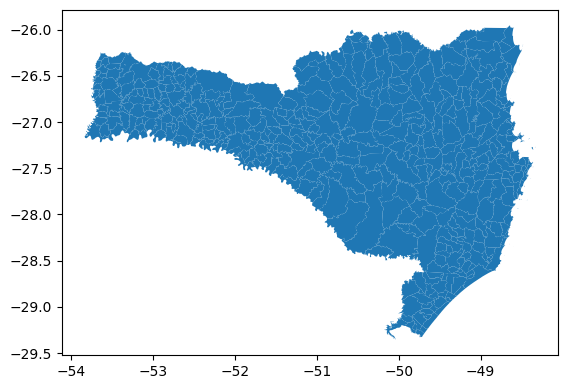

In [4]:
# Plotando o arquivo do geopandas - utilizando o matplotlib

geoData.plot()
geoData.columns

<Axes: >

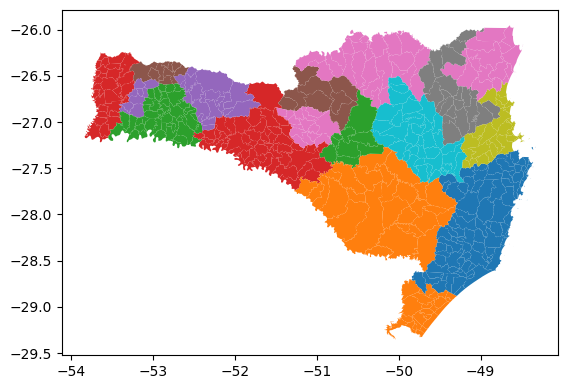

In [5]:
# Plotando com estilo - usar uma coluna do geoData para colorir o mapa

geoData.plot(column='CD_RGI')

<Axes: >

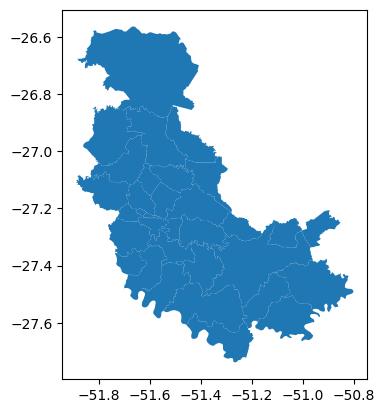

In [7]:
# Selecionar uma região de interesse

# Usando um código de região como exemplo
cod = '420008'

# Plotando a região selecionada
geoData[geoData['CD_RGI']==cod].plot()

## Abrindo arquivos com focos de queimadas no mundo.

Fonte de dados:
https://www2.acom.ucar.edu/modeling/finn-fire-inventory-ncar

Acesso para download:
https://rda.ucar.edu/datasets/d312009/dataaccess/#

Ou arquivo de um único dia:
https://www.acom.ucar.edu/acresp/MODELING/finn_emis_txt/FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt.gz

# Utilizando script para download

import sys, os
from urllib.request import build_opener

opener = build_opener()

filelist = [
  'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz'
]

for file in filelist:
    ofile = os.path.basename(file)
    sys.stdout.write("downloading " + ofile + " ... ")
    sys.stdout.flush()
    infile = opener.open(file)
    outfile = open(ofile, "wb")
    outfile.write(infile.read())
    outfile.close()
    sys.stdout.write("done\n")


In [12]:
# Enquanto isso... 

# Criando um dataframe com pontos e transformando em geodataframe
import pandas as pd
dataSample = pd.DataFrame({'lon':[-48], 'lat':[-27], 'fire':[10]})

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    dataSample, geometry=gpd.points_from_xy(dataSample.lon, dataSample.lat), crs="EPSG:4326"
)

gdf.head()

,lon,lat,fire,geometry
0,-48,-27,10,POINT (-48 -27)


In [14]:
# Plotando o ponto no espaço
# Precisaremos instalar os pacotes branca e folium - pip install branca folium mapclassify
gdf.explore()

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.